#Global Videogames 🎮👾

En este proyecto se realizará un análisis exploratorio de los datos de este dataset. El mismo contiene datos (parciales) de videojuegos entre los años 1980 y 2020. A través de este análisis determinaremos hipótesis sobre los años de mayo auge de lanzamientos, consolas que lideran el mercado, así como los géneros y clasificaciones de mayor impacto en cuanto a las ventas. Este análisis será realizado a través de visualizaciones y resúmenes estadísticos que nos van a permitir responder nuestras consignas.

##Definición del objetivo:
Analizar datos de videojuegos en una muestra entre los años 1980 y
2020 para poder identificar factores como ventas por plataforma, género o año
de lanzamiento. Esto ayudará a identificar los puntos fuertes del
mercado tales como la demanda por plataforma, género y/o clasificación para
plantear estrategias futuras en el mercado.

###Preguntas de interés:
1. ¿Cuál es el año de mayor auge de lanzamientos de videojuegos?
2. ¿Cuál es la consola que lidera el mercado de lanzamientos? ¿Y la que lidera el mercado de ventas?
3. ¿Cuál es el género que posee el mayor número de entregas? ¿Y el de mayor recaudación en cuanto a ventas?
4. ¿Cuál es el rango de edad al que están destinados la mayoría de juegos?


##Normalización de los datos:

Se realizó una normalización de los datos, dado que al separar los datos por comas (,) el csv arrojaba columnas que no correspondían al modelo final de la BD. Esto se debe a que en la columna de nombres, existían títulos que incluían comas. Lo que generaba que la visual final contenga datos sucios en las columnas.
La normalización se realizó quitando los datos sucios, dado que en proporción no significaban un porcentaje que modifica a gran escala los datos a obtener.

##Análisis exploratorio de los datos:

Se realizará una pequeña consulta de la DB para poder obtener una vista preliminar de los datos incluidos en la misma.

##Verificación de nulos:

Se realizará una verificación de nulos en la BD y se manejarán los datos de ser necesario.

##Visualizaciones:

Utilizaremos visuales para explorar la BD con el fin de obtener la información necesaria para resolver nuestras incógnitas.

In [ ]:
#Importamos las librerías necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Cargamos el DB
from google.colab import drive
drive.mount('/content/gdrive')
bd_juegos=('/content/gdrive/MyDrive/Proyecto Final Coderhouse/juegos_bd.xlsx')

#Realizamos una exploracion a la BD
bd_juegos=pd.read_excel('/content/gdrive/MyDrive/Proyecto Final Coderhouse/juegos_bd.xlsx')
bd_juegos.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Verificacion de nulos
print("\nValores nulos en el conjunto de datos:")
print(bd_juegos.isnull().sum())


Valores nulos en el conjunto de datos:
Name                  0
Platform              0
Year_of_Release     267
Genre                 0
Publisher            53
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8476
Critic_Count       8476
User_Score         6604
User_Count         9021
Developer          6523
Rating             6669
dtype: int64


Vamos a realizar un tratamiento para los valores nulos:

En este caso nos limitaremos a eliminar los datos nulos, dado que no aportan significancia para el análisis. Se toma la desición debido a que, en caso de manipular los datos de otra manera, pueden surgir cambios en los análisis que realizaremos a futuro.

In [ ]:
bdlimpia = bd_juegos.dropna(subset=['Year_of_Release', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'])

In [ ]:
#Trabajaremos sobre la BD para obtener graficos que nos permitan evacuar las incognitas planteadas:

#1.¿Cuál es el año de mayor auge de lanzamientos de videojuegos?

lanzamientos_por_año = bd_juegos.groupby('Year_of_Release')['Name'].count()

# Encontrar el año con mayor número de lanzamientos de juegos
año_max_lanzamientos = lanzamientos_por_año.idxmax()

# Crear el gráfico interactivo con Plotly
data = [go.Bar(x=lanzamientos_por_año.index, y=lanzamientos_por_año.values)]
layout = go.Layout(title='Lanzamientos de juegos por año',
                   xaxis=dict(title='Año de lanzamiento'),
                   yaxis=dict(title='Número de juegos lanzados'))
fig = go.Figure(data=data, layout=layout)

# Añadir línea vertical para resaltar el año con más lanzamientos
fig.add_shape(type='line',
              x0=año_max_lanzamientos, y0=0,
              x1=año_max_lanzamientos, y1=max(lanzamientos_por_año),
              line=dict(color='red', width=2, dash='dash'))

# Mostrar el gráfico
fig.show()

# Hipotesis
print("\nRespuesta:")
print(f"De los datos obtenidos, podemos deducir que el año con más lanzamientos es el {año_max_lanzamientos}, con un total de 1415 juegos lanzados.")


Respuesta:
De los datos obtenidos, podemos deducir que el año con más lanzamientos es el 2008.0, con un total de 1415 juegos lanzados.


In [ ]:
#2. ¿Cuál es la consola que lidera el mercado de lanzamientos? ¿Y la que lidera el mercado de ventas?

# Agrupar los datos por consola y contar el número de juegos lanzados por consola
juegos_por_consola = bd_juegos.groupby('Platform')['Name'].count()

# Encontrar la consola con el mayor número de lanzamientos de juegos
lanzamientos_por_consola = bd_juegos.groupby('Platform')['Name'].count()

# Encontrar la consola con el mayor número de lanzamientos de juegos
consola_max_lanzamientos = lanzamientos_por_consola.idxmax()

# Crear un DataFrame para los datos del gráfico
df_grafico = pd.DataFrame({'Plataforma': lanzamientos_por_consola.index, 'Lanzamientos': lanzamientos_por_consola.values})

# Ordenar el DataFrame por número de lanzamientos
df_grafico = df_grafico.sort_values(by='Lanzamientos', ascending=False)

# Crear el gráfico interactivo con Plotly
fig = px.bar(df_grafico, x='Plataforma', y='Lanzamientos', title='Lanzamientos de juegos por consola')
fig.show()

# Hipotesis
print(f"La consola con más lanzamientos es la {consola_max_lanzamientos}, que tiene un total de 2143 juegos lanzados.")



La consola con más lanzamientos es la PS2, que tiene un total de 2143 juegos lanzados.


In [ ]:
# Agrupar los datos por plataforma (consola) y sumar las ventas globales de juegos
ventas_por_consola = bd_juegos.groupby('Platform')['Global_Sales'].sum().reset_index()

# Encontrar la consola con el mayor número de ventas de juegos
consola_max_ventas = ventas_por_consola.loc[ventas_por_consola['Global_Sales'].idxmax()]

# Crear el gráfico interactivo con Plotly
fig = px.scatter(ventas_por_consola, x='Platform', y='Global_Sales', title='Ventas globales de juegos por consola')
fig.update_traces(marker=dict(size=12, color='skyblue'), selector=dict(mode='markers'))
fig.update_layout(xaxis_title='Plataforma', yaxis_title='Ventas Globales')
fig.show()

print("\nRespuesta:")
print(f"A traves de los datos obtenidos, se obtiene que la consola que lidera tanto la cantidad de lanzamientos como la mayor recaudacion de ventas es la PS2, con un total de 2143 juegos lanzados y 1251,18 millones de dólares en ventas.")


Respuesta:
A traves de los datos obtenidos, se obtiene que la consola que lidera tanto la cantidad de lanzamientos como la mayor recaudacion de ventas es la PS2, con un total de 2143 juegos lanzados y 1251,18 millones de dólares en ventas.


In [ ]:
#3. ¿Cuál es el género que posee el mayor número de entregas? ¿Y el de mayor recaudación en cuanto a ventas?

# Agrupar los datos por género y sumar las ventas globales de juegos
lanzamientos_por_genero = bd_juegos.groupby('Genre')['Name'].count().reset_index()

# Encontrar el género con la mayor cantidad de lanzamientos de juegos
genero_max_lanzamientos = lanzamientos_por_genero.loc[lanzamientos_por_genero['Name'].idxmax()]

# Crear el gráfico interactivo con Plotly
fig = px.bar(lanzamientos_por_genero, x='Name', y='Genre', orientation='h', title='Cantidad de lanzamientos de juegos por género')
fig.update_traces(marker_color='skyblue', selector=dict(type='bar'))
fig.update_layout(xaxis_title='Cantidad de Lanzamientos', yaxis_title='Género')
fig.show()

# Hipotesis
print("El género con más lanzamientos es Action, que tiene un total de 3347 juegos lanzados.")

El género con más lanzamientos es Action, que tiene un total de 3347 juegos lanzados.


In [ ]:
# Agrupar los datos por género y sumar las ventas globales de juegos
ventas_por_genero = bd_juegos.groupby('Genre')['Global_Sales'].sum().reset_index()

# Encontrar el género con la mayor cantidad de ventas de juegos
genero_max_ventas = ventas_por_genero.loc[ventas_por_genero['Global_Sales'].idxmax()]

# Crear el gráfico interactivo con Plotly
fig = px.pie(ventas_por_genero, values='Global_Sales', names='Genre', title='Ventas globales de juegos por género')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

print("\nRespuesta:")
print(f"El género con mayores ventas es: {genero_max_ventas['Genre']} con un total de ventas de {genero_max_ventas['Global_Sales']} millones de dólares.")


Respuesta:
El género con mayores ventas es: Action con un total de ventas de 1739.12 millones de dólares.


In [ ]:
# Para el siguiente punto, primero dejaremos una imagen que explica la clasificacion de las edades segun sus respectivos codigos.

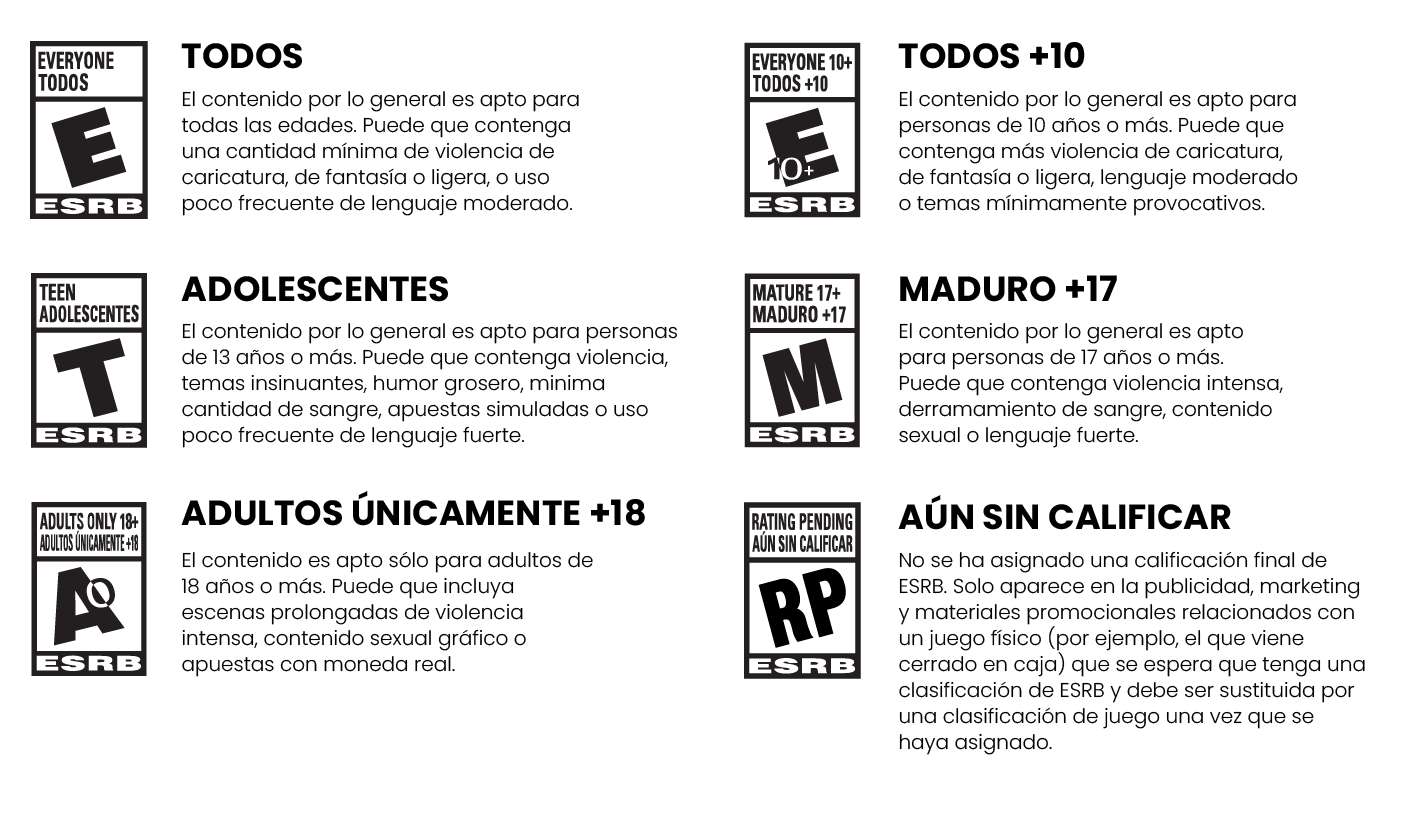

In [ ]:
#4. ¿Cuál es el rango de edad al que están destinados la mayoría de juegos?

# Agrupar los datos por clasificación de edad y contar el número de juegos lanzados por clasificación de edad
contadores_por_clasificacion = bd_juegos['Rating'].value_counts().reset_index()
contadores_por_clasificacion.columns = ['Rating', 'Cantidad']

# Ordenar el DataFrame por la clasificación de edad
contadores_por_clasificacion = contadores_por_clasificacion.sort_values(by='Rating')

# Crear el gráfico interactivo con Plotly
fig = px.area(contadores_por_clasificacion, x='Rating', y='Cantidad', title='Distribución de lanzamientos de juegos por clasificación de edad')
fig.update_traces(marker_color='skyblue')
fig.update_layout(xaxis_title='Clasificación de Edad', yaxis_title='Número de Lanzamientos')
fig.show()

print("\nRespuesta:")
print("La clasificación de edad con más lanzamientos es: E, con un total de 3979 juegos lanzados.")


Respuesta:
La clasificación de edad con más lanzamientos es: E, con un total de 3979 juegos lanzados.


#¿Qué tipo de aprendizaje estamos usando?

Basándonos en la naturaleza de los datos y su implementación podemos inferir que estamos hablando de un aprendizaje supervisado.

El aprendizaje supervisado implica entrenar un modelo utilizando datos etiquetados, es decir, datos que tienen una variable objetivo conocida. En este caso, podríamos utilizar los datos históricos de lanzamientos y ventas de juegos como conjunto de entrenamiento, donde la variable objetivo sería la cantidad de ventas. Utilizando estas características (como género, plataforma, etc.) como variables independientes, podríamos entrenar un modelo para predecir las ventas de nuevos juegos.

Por ej., podríamos utilizar regresión lineal, regresión logística u otros algoritmos de aprendizaje supervisado para predecir las ventas de un nuevo juego en función de sus características. El modelo aprenderá de los datos históricos y podrá hacer predicciones sobre las ventas de futuros lanzamientos.

#Contexto comercial:

Los datos sobre los lanzamientos y ventas de juegos de video pueden proporcionar una variedad de información valiosa para diferentes contextos. Comor por ej.:

###Desarrollo y Publicación de Juegos:
Los estudios de desarrollo de juegos podrían utilizar estos datos para comprender mejor las tendencias del mercado y tomar decisiones sobre qué géneros de juegos son más populares en diferentes plataformas. Esto podría guiar su estrategia de desarrollo y ayudarles a decidir en qué tipos de juegos invertir más recursos.

###Marketing:
Las empresas de marketing podrían utilizar estos datos para identificar oportunidades de colaboración con estudios de juegos, plataformas de distribución o influencers en el espacio de los videojuegos. Al comprender qué juegos y géneros son más populares, podrían dirigir de manera más efectiva sus campañas publicitarias y patrocinios.

###Análisis de Competencia:
El análisis de mercado podría utilizar estos datos para realizar comparaciones entre diferentes empresas en la industria de los videojuegos. Esto podría incluir evaluar la competencia entre plataformas de juegos, o analizar la popularidad de géneros específicos en el mercado.

#Contexto Analítico:

Estos datos pueden ser utilizados para extraer insights valiosos y tomar decisiones más dirigidas: Como po ej.:

###Análisis de Tendencias:
Al analizar la evolución de los lanzamientos y ventas de juegos a lo largo del tiempo, se pueden identificar tendencias y patrones que ayuden a comprender cómo ha cambiado el mercado de los videojuegos a lo largo de los años. Esto podría incluir el análisis de tendencias por género, plataforma, etc.

###Segmentación de Mercado:
Al segmentar los datos por diferentes variables como género, plataforma, clasificación de edad, etc., se pueden identificar segmentos de mercado específicos que presentan oportunidades de negocio. Por ejemplo, se podría identificar qué géneros de juegos son más populares entre diferentes grupos de edades.

###Análisis de Rentabilidad:
Al correlacionar los datos de ventas con los costos de desarrollo y marketing, se pueden realizar análisis de rentabilidad para evaluar el rendimiento financiero de diferentes juegos y proyectos. Esto podría ayudar a tomar decisiones de sobre qué juegos continuar desarrollando, cuáles descontinuar, etc.

En resumen, en un contexto analítico, estos datos pueden ser utilizados para comprender mejor el mercado, identificar oportunidades de negocio, tomar decisiones estratégicas y predecir tendencias futuras.

#Implementación de un método de selección para la reducción de la BD:

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in ColumnsCategorica:
    bd_juegos[col] = bd_juegos[col].astype(str)

bdlimpia = bd_juegos[['Genre', 'Platform', 'Rating', 'Global_Sales', 'Year_of_Release']]
bdlimpia[ColumnsCategorica] = bd_juegos[ColumnsCategorica].apply(LabelEncoder().fit_transform)

<ipython-input-37-e897452b8a77>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



En este caso solo nos quedamos con las columnas que aporten datos necesaios para los análisis a realizar.
Nos quedamos con los datos de genero, clasificación, ventas y año de lanzamiento que son los datos que se van a utilizar en los modelos predictivos.

#Implementación de un algoritmo para el entrenamiento de los datos



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Seleccionar características y variable objetivo
X = bdlimpia.drop(columns = ['Genre', 'Platform', 'Rating'])
y = bdlimpia['Global_Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Preprocesar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión Lasso
lasso = Lasso(alpha=0.1)  # Puedes ajustar el parámetro alpha según sea necesario
lasso.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 0.015602788658237242


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Seleccionar características y variable objetivo
X = bdlimpia[['Genre', 'Platform', 'Rating']]
y = bd_juegos['Global_Sales']

# Codificar características categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=15)

# Preprocesar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión Lasso
lasso = Lasso(alpha=0.1)  # Puedes ajustar el parámetro alpha según sea necesario
lasso.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)



Error cuadrático medio: 1.279624224847912


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calcular predicciones del modelo
y_pred = lasso.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)


Error cuadrático medio (MSE): 1.279624224847912
Coeficiente de determinación (R^2): 0.017185985272349935
Error absoluto medio (MAE): 0.5637938784582857


Conclusión: las métricas indican que el modelo Lasso tiene un ajuste limitado a los datos y que las predicciones tienden a desviarse significativamente del valor real. Puede haber margen de mejora en el modelo. Sería útil explorar diferentes técnicas de modelado, ajustar los parámetros del modelo actual o considerar la inclusión de características adicionales para mejorar la calidad de las predicciones.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Seleccionar características relevantes y objetivo
X = bd_juegos[['Platform', 'Year_of_Release', 'Genre', 'Rating', 'User_Score']]
y = bd_juegos['Global_Sales']

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Entrenar el modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=15)
modelo_rf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo_rf.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", error)

# Realizar predicciones
# Por ejemplo, si quieres predecir las ventas de un juego específico:
nuevo_juego = X_test.iloc[[0]]  # Suponiendo que queremos predecir las ventas del primer juego en el conjunto de prueba
ventas_predichas = modelo_rf.predict(nuevo_juego)
print("Ventas predichas del nuevo juego:", ventas_predichas)


Error cuadrático medio: 1.5224335349223028
Ventas predichas del nuevo juego: [2.17172]


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio (MSE): 1.5224335349223028
Error absoluto medio (MAE): 0.5160737243510397
Coeficiente de determinación (R^2): -0.16930344515073048


Conclusión: basándonos en estas métricas, podemos concluir que el modelo Random Forest no está funcionando bien en este conjunto de datos. El MSE y el MAE son relativamente altos, lo que indica que el modelo tiene un error significativo en sus predicciones. Además, el R^2 negativo sugiere que el modelo no se ajusta bien a los datos. Sería necesario investigar y ajustar el modelo para mejorar su rendimiento.

#Hipótesis final:

De la exploración realizada a nuestra base de datos, podemos inferir que los lanzamientos de juegos tuvieron un crecimiento considerable desde el año 2004 al 2008. De estos, la mayor proporción pertenecen a la consola PS2 y son del genero de acción, ambos liderando el ranking de lanzamientos y de ventas totales.
Al mismo tiempo, estos fueron destinados como clasificación de edad RP (pendientes de catalogar). No sería erróneo pensar que la mayoría de estos sean al final catalogados como E (para todas las edades), teniendo en cuenta que es el 2do rating con más lanzamientos.
Estos datos son valiosos dado que, en su momento, los análisis como este proporcionaban información relevante acerca del comportamiento del mercado, de sus ventas y de hacia dónde estaba apuntando el mundo del gaming en esos años. Actualmente, es un mercado sumamente amplio y que sigue en crecimiento. Si bien nuestra DB no cuenta con datos concretos de los años recientes, a simple vista el mercado todavía mantiene el mismo rumbo en cuanto al género y la clasificación de edad.